# **WiDS Datathon 2024 Challenge #2**

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aminawasiq","key":"d2eca9cc6cab297e3a437bbace531605"}'}

In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c widsdatathon2024-challenge2


 88% 5.00M/5.71M [00:00<00:00, 50.6MB/s]
100% 5.71M/5.71M [00:00<00:00, 55.6MB/s]


In [ ]:
!unzip widsdatathon2024-challenge2.zip
!ls

Archive:  widsdatathon2024-challenge2.zip
  inflating: solution_template.csv   
  inflating: test.csv                
  inflating: train.csv               
kaggle.json  solution_template.csv  train.csv
sample_data  test.csv		    widsdatathon2024-challenge2.zip


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.base import clone
from sklearn.pipeline import make_pipeline
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import OrdinalEncoder, RobustScaler
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# **Loading the data**

In [ ]:
train= pd.read_csv('/content/train.csv')

train.head()

patient_id patient_race  payer_type patient_state  patient_zip3   Region  \
0      268700          NaN  COMMERCIAL            AR           724    South   
1      484983        White         NaN            IL           629  Midwest   
2      277055          NaN  COMMERCIAL            CA           925     West   
3      320055     Hispanic    MEDICAID            CA           900     West   
4      190386          NaN  COMMERCIAL            CA           934     West   

             Division  patient_age patient_gender    bmi  ...  \
0  West South Central           39              F    NaN  ...   
1  East North Central           55              F  35.36  ...   
2             Pacific           59              F    NaN  ...   
3             Pacific           59              F    NaN  ...   
4             Pacific           71              F    NaN  ...   

  Average of Apr-18 Average of May-18 Average of Jun-18 Average of Jul-18  \
0             52.55             74.77             79.96             81.69   
1             49.30             72.87             77.40             77.43   
2             68.50             70.31             78.61             87.24   
3             63.34             63.10             67.45             75.86   
4             59.45             60.24             64.77             69.81   

  Average of Aug-18  Average of Sep-18  Average of Oct-18  Average of Nov-18  \
0             78.30              74.56              59.98              42.98   
1             75.83              72.64              58.36              39.68   
2             85.52              80.75              70.81              62.67   
3             75.24              71.10              68.95              65.46   
4             70.13              68.10              65.38              60.72   

   Average of Dec-18  metastatic_diagnosis_period  
0              41.18                          191  
1              39.71                           33  
2              55.58                          157  
3              59.46                          146  
4              54.08                          286  

[5 rows x 152 columns]

In [ ]:
test = pd.read_csv('/content/test.csv')

test.head()

patient_id patient_race  payer_type patient_state  patient_zip3 Region  \
0      730681          NaN  COMMERCIAL            LA           713  South   
1      334212        Black         NaN            NC           283  South   
2      571362          NaN  COMMERCIAL            TX           794  South   
3      907331          NaN  COMMERCIAL            TN           373  South   
4      208382        Asian         NaN            WA           980   West   

             Division  patient_age patient_gender    bmi  ...  \
0  West South Central           55              F    NaN  ...   
1      South Atlantic           60              F  40.00  ...   
2  West South Central           54              F  32.33  ...   
3  East South Central           63              F  27.07  ...   
4             Pacific           62              F    NaN  ...   

  Average of Mar-18 Average of Apr-18 Average of May-18 Average of Jun-18  \
0             62.21             62.23             78.34             81.96   
1             48.63             58.14             77.26             80.05   
2             57.82             59.95             77.79             82.45   
3             47.57             53.50             71.31             75.20   
4             41.02             46.25             56.92             57.88   

  Average of Jul-18  Average of Aug-18  Average of Sep-18  Average of Oct-18  \
0             83.58              82.22              80.20              69.73   
1             82.88              82.09              78.85              64.60   
2             82.44              80.77              72.16              59.31   
3             76.96              75.78              74.87              61.06   
4             66.16              65.21              57.52              49.53   

   Average of Nov-18  Average of Dec-18  
0              53.14              51.34  
1              50.57              48.10  
2              48.25              42.13  
3              44.31              42.83  
4              43.75              38.33  

[5 rows x 151 columns]

In [ ]:
solution_raw = pd.read_csv('/content/solution_template.csv')

In [ ]:
# Get the shape of the DataFrame
shape_train = train.shape

# Print the shape
print("Shape of train data:", shape_train)

Shape of train data: (13173, 152)


In [ ]:
# Get the shape of the DataFrame
shape_test = test.shape

# Print the shape
print("Shape of test data:", shape_test)

Shape of test data: (5646, 151)


# **Plot of Missing Values**

<Axes: >

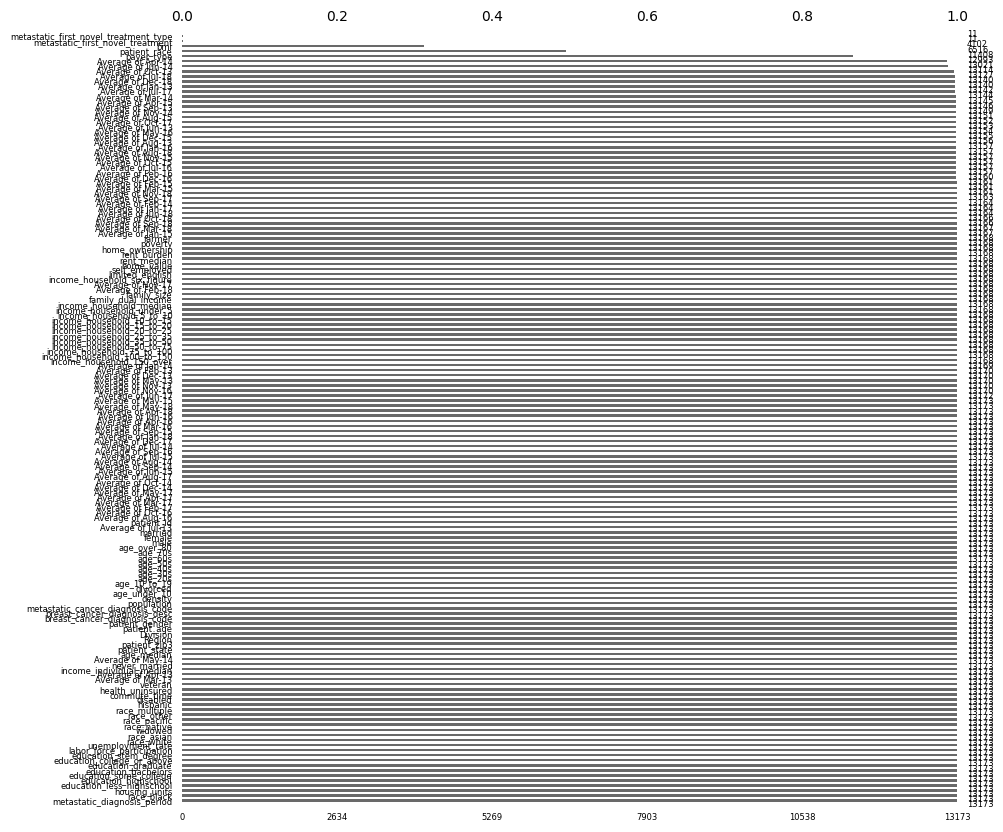

In [ ]:
# Plot missing values in the training set

msno.bar(train, figsize=(10, 10), fontsize=6, sort="descending")

<Axes: >

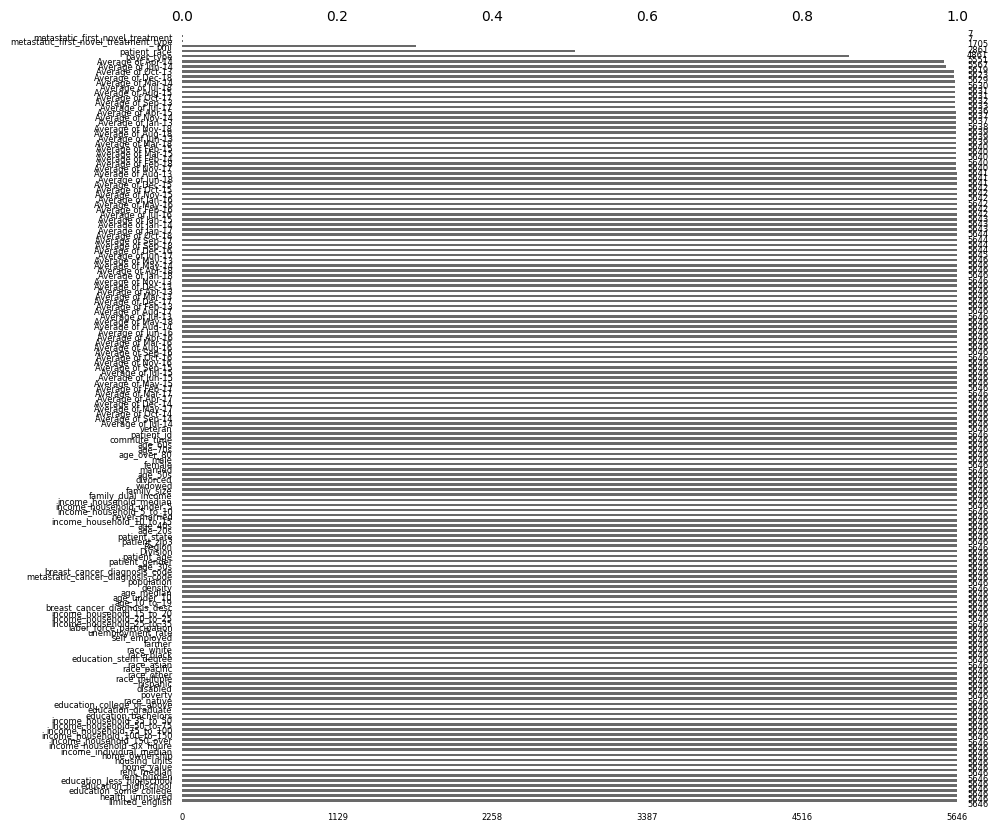

In [ ]:
# Plot missing values in the test set

msno.bar(test, figsize=(10, 10), fontsize=6, sort="descending")

# **Descriptive Statistics - Numerical and Categorical Columns**


The columns with the most missing values in this dataset are categorized by their data types:

**Categorical Columns:**
1. **metastatic_first_novel_treatment**: Missing in 99.92% of rows
2. **metastatic_first_novel_treatment_type**: Missing in 99.92% of rows
3. **payer_type**: Missing in 13.40% of rows
4. **patient_race**: Missing in 50.54% of rows

**Numerical Column:**
1. **bmi**: Missing in 68.86% of rows

These columns have the highest percentages of missing data across their respective data types.

In [ ]:
def describe_data(data):
    desc = pd.DataFrame({
        'type': data.dtypes,
        'count': data.count(),
        'nunique': data.nunique(),
        'unique%': data.nunique() / len(data) * 100,
        'null': data.isnull().sum(),
        'null%': data.isnull().sum() / len(data) * 100
    })

    desc = pd.concat([desc, data.describe().T.drop('count', axis=1)], axis=1)
    desc = desc.sort_values(by=['type', 'null%'])

    # Calculate outliers and outlier percentage for numeric columns only
    numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
    outliers = {}
    outlier_percentage = {}
    for column in numeric_columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        outliers[column] = ((data[column] < (Q1 - 1.5 * IQR)) | (data[column] > (Q3 + 1.5 * IQR))).sum()
        outlier_percentage[column] = (outliers[column] / len(data)) * 100

    # Add outliers and outlier percentage to the DataFrame
    desc['outliers'] = pd.Series(outliers)
    desc['outlier%'] = pd.Series(outlier_percentage)

    # Apply background gradient with Blues colormap
    styled_desc = desc.style.background_gradient(axis=0, cmap='Blues')

    return styled_desc

# Describe train data
styled_train_description = describe_data(train)

# Display styled description
styled_train_description


In [ ]:
def describe_data(data):
    desc = pd.DataFrame({
        'type': data.dtypes,
        'count': data.count(),
        'nunique': data.nunique(),
        'unique%': data.nunique() / len(data) * 100,
        'null': data.isnull().sum(),
        'null%': data.isnull().sum() / len(data) * 100
    })

    desc = pd.concat([desc, data.describe().T.drop('count', axis=1)], axis=1)
    desc = desc.sort_values(by=['type', 'null%'])

    # Calculate outliers and outlier percentage for numeric columns only
    numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
    outliers = {}
    outlier_percentage = {}
    for column in numeric_columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        outliers[column] = ((data[column] < (Q1 - 1.5 * IQR)) | (data[column] > (Q3 + 1.5 * IQR))).sum()
        outlier_percentage[column] = (outliers[column] / len(data)) * 100

    # Add outliers and outlier percentage to the DataFrame
    desc['outliers'] = pd.Series(outliers)
    desc['outlier%'] = pd.Series(outlier_percentage)

    # Apply background gradient with Blues colormap
    styled_desc = desc.style.background_gradient(axis=0, cmap='Blues')

    return styled_desc

# Describe test data
styled_test_description = describe_data(test)

# Display styled description
styled_test_description

# **EDA**

## **Box plots of Numerical Columns**

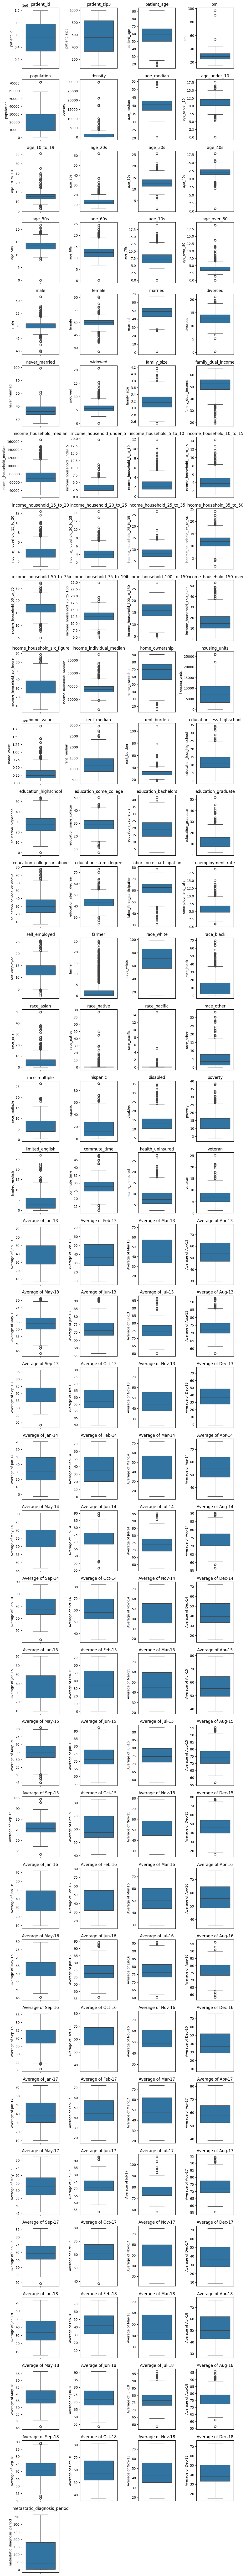

In [ ]:
# Draw box plots of numerical columns using subplots
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns


# Adjusting the subplot grid size to accommodate all numeric columns
num_cols = len(numeric_cols)
num_rows = (num_cols // 4) + (1 if num_cols % 4 else 0)  # Adjust the number of rows in the grid

plt.figure(figsize=(10, num_rows * 3))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(num_rows, 4, i)
    sns.boxplot(data=train[col])
    plt.title(col)

plt.tight_layout()
plt.show()

* There are 3 outliers in the bmi column.

* Most of the other columns are percentages or median values so we cannot Consider their extreme values as outliers because they can have high as well as low values, so they are most likely to be considered as correct values.

## **Histograms - Numeric Columns**

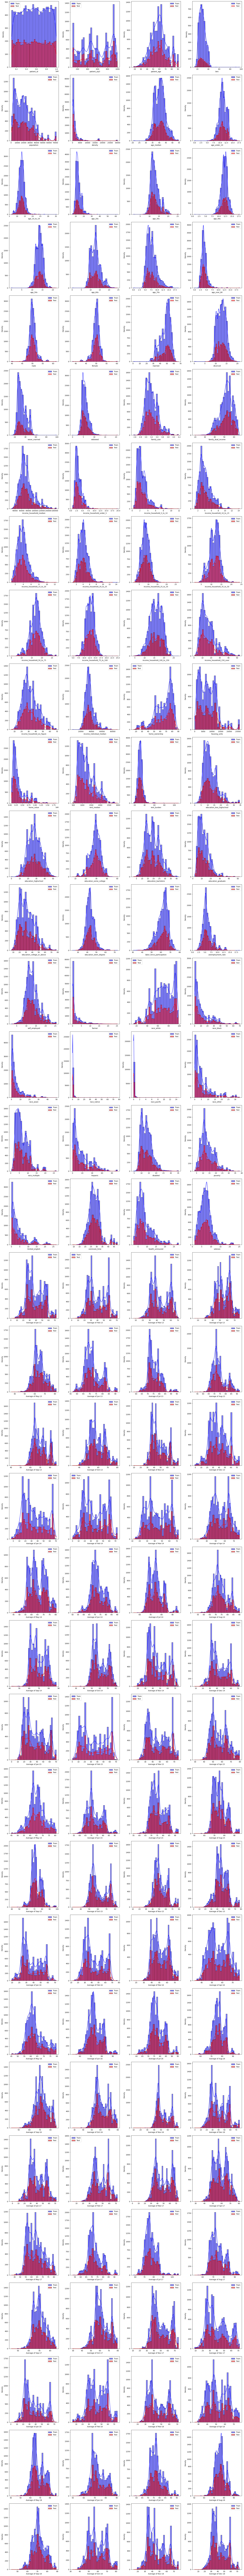

In [ ]:
# Numerical Disterbution
# Get numerical columns excluding the target variable
train_numerical_columns = train.select_dtypes(include=['int64', 'float64']).drop(columns=['metastatic_diagnosis_period'])
test_numerical_columns = test.select_dtypes(include=['int64', 'float64'])

# Calculate the number of rows and columns needed for subplots
num_columns = max(len(train_numerical_columns.columns), len(test_numerical_columns.columns))
num_rows = math.ceil(num_columns / 4)

# Setting up the figure size
plt.figure(figsize=(20, 6 * num_rows))

# Looping through each numerical column to create histograms
for i, column in enumerate(train_numerical_columns.columns, 1):
    plt.subplot(num_rows, 4, i)
    sns.histplot(train[column].dropna(), kde=True, color='blue', alpha=0.5, bins=30, label='Train')
    sns.histplot(test[column].dropna(), kde=True, color='red', alpha=0.5, bins=30, label='Test')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()

Most of the numeric columns have skewed distributions.

## **Plots of Categorical Columns**

<ipython-input-27-8235ba055e92>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=column, palette=custom_palette)
<ipython-input-27-8235ba055e92>:16: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.countplot(data=train, x=column, palette=custom_palette)
<ipython-input-27-8235ba055e92>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=column, palette=custom_palette)
<ipython-input-27-8235ba055e92>:16: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.countplot(data=train, x=column, palette=custom_palette)
<ipython-input-27-8235ba055e92>:16: FutureWarning: 

P

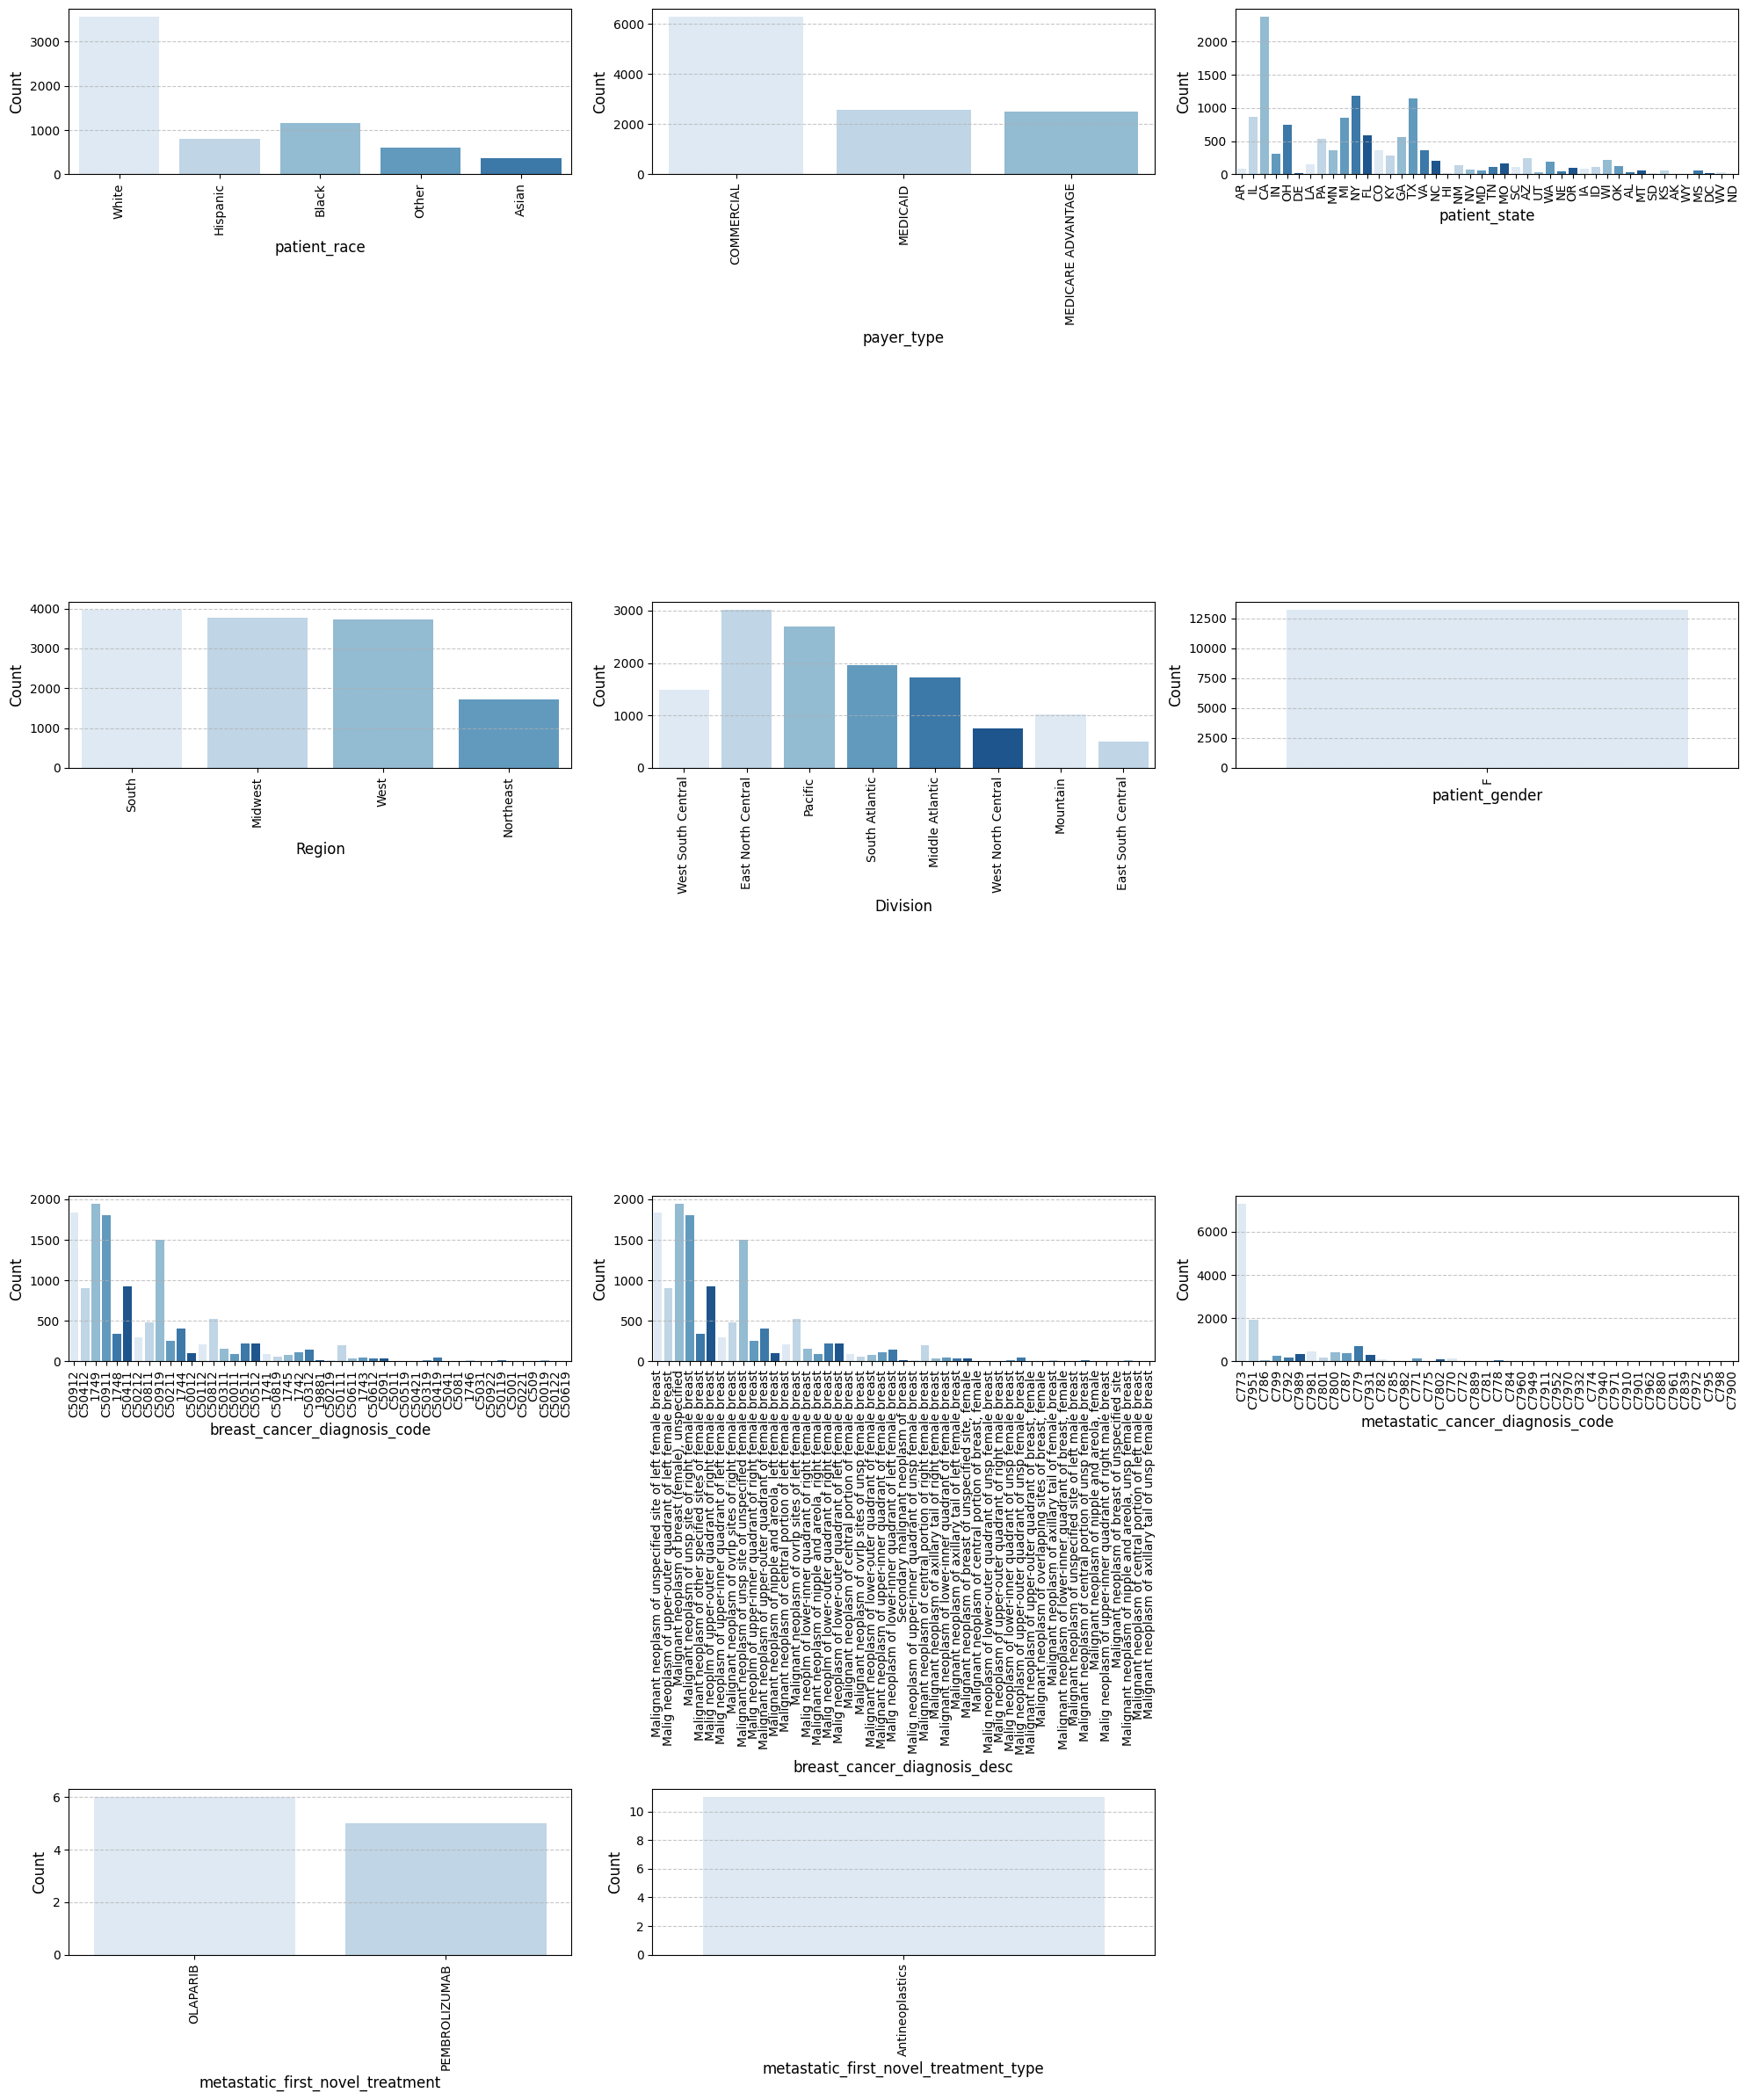

In [ ]:
# Selecting only categorical columns
categorical_columns = train.select_dtypes(include=['object']).columns

# Calculate the number of rows needed based on the number of categorical columns
num_rows = (len(categorical_columns) + 2) // 3  # Add 2 for rounding up

# Setting up the figure size
plt.figure(figsize=(20, num_rows * 6))  # Adjust the height based on the number of rows

# Define custom color palette
custom_palette = sns.color_palette("Blues")

# Looping through each categorical column to create count plots
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(num_rows, 3, i)  # Adjust the number of columns to 3
    sns.countplot(data=train, x=column, palette=custom_palette)
    plt.xlabel(column, fontsize=12)  # Increase font size for x-label
    plt.ylabel('Count', fontsize=12)  # Increase font size for y-label
    plt.xticks(rotation=90, fontsize=10)  # Rotate x-axis labels by 90 degrees and increase font size
    plt.yticks(fontsize=10)  # Increase font size for y-axis labels
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines on y-axis with dashed style

plt.tight_layout()
plt.show()


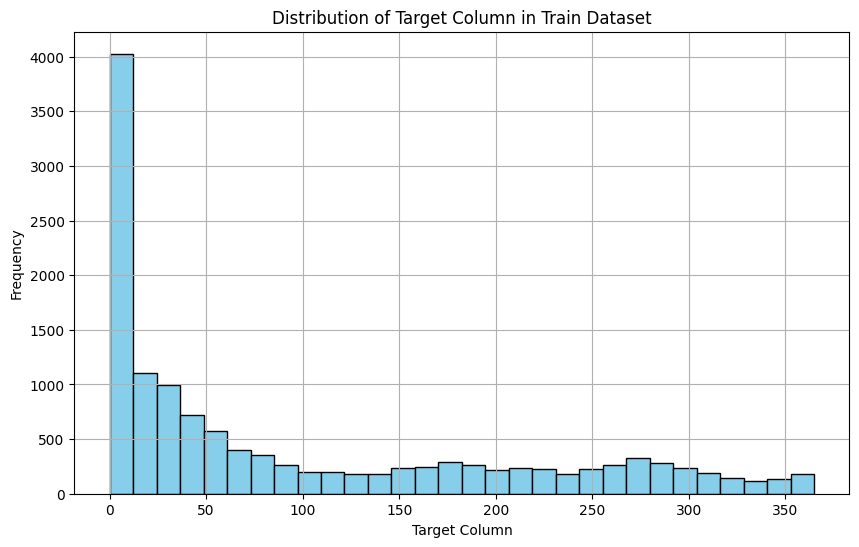

In [ ]:

# Plotting the distribution of the target column in the train dataset
plt.figure(figsize=(10, 6))
plt.hist(train['metastatic_diagnosis_period'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Target Column')
plt.ylabel('Frequency')
plt.title('Distribution of Target Column in Train Dataset')
plt.grid(True)
plt.show()


# **Correlation with Target**

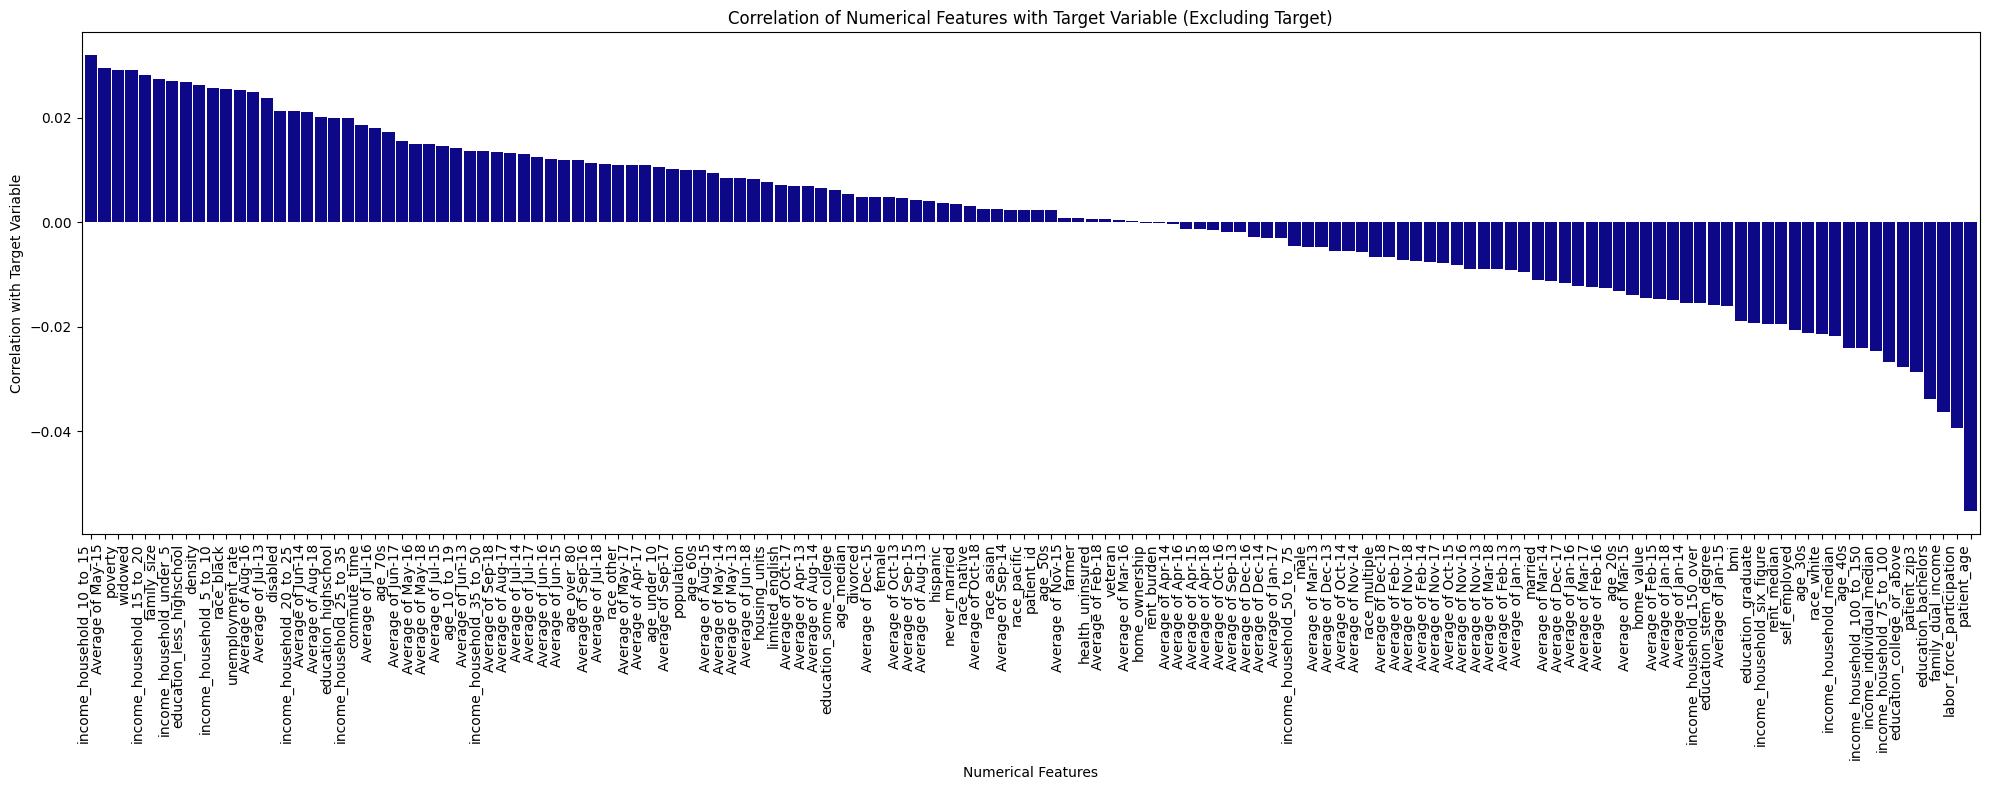

In [ ]:
# Selecting only numerical columns
numerical_columns = train.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
corr_matrix = numerical_columns.corr()

# Specify the target variable
target_variable = 'metastatic_diagnosis_period'

# Sort the correlations with the target variable
corr_with_target = corr_matrix[target_variable].sort_values(ascending=False)

# Drop the target variable from the correlation Series
corr_without_target = corr_with_target.drop(target_variable)

# Plotting the correlations without the target variable
plt.figure(figsize=(20, 8))  # Increase figure width to accommodate longer x-axis labels
bar_width = 0.9  # Adjust the width of the bars

# Specify a different color map
color_map = 'plasma'

# Plotting
corr_without_target.plot(kind='bar', colormap=color_map, width=bar_width)
plt.xlabel('Numerical Features')
plt.ylabel('Correlation with Target Variable')
plt.title('Correlation of Numerical Features with Target Variable (Excluding Target)')
plt.xticks(rotation=90, ha='right', fontsize=10)  # Rotate x-axis labels for better readability
plt.margins(x=0.11)  # Set margins to provide space for x-axis labels
plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import f_oneway

# Define a function to perform ANOVA and print results
def perform_anova(df, categorical_column, target_column):
    groups = df.groupby(categorical_column)[target_column].apply(list)
    if len(groups) < 2:
        print("Skipping ANOVA for", categorical_column, "as there is only one group")
        return
    f_statistic, p_value = f_oneway(*groups)
    print("ANOVA results for", categorical_column)
    print("F-Statistic:", f_statistic)
    print("P-Value:", p_value)
    if p_value < 0.05:
        print("The difference in means is statistically significant (reject null hypothesis)")
    else:
        print("The difference in means is not statistically significant (fail to reject null hypothesis)")
    print()

# Perform ANOVA for each categorical variable against the target variable
categorical_columns = ['patient_state', 'Region', 'Division', 'patient_gender', 'breast_cancer_diagnosis_code',
                       'breast_cancer_diagnosis_desc', 'metastatic_cancer_diagnosis_code', 'payer_type',
                       'patient_race', 'metastatic_first_novel_treatment', 'metastatic_first_novel_treatment_type']

for column in categorical_columns:
    perform_anova(train, column, 'metastatic_diagnosis_period')


ANOVA results for patient_state
F-Statistic: 2.9206301185383747
P-Value: 5.862544994732054e-10
The difference in means is statistically significant (reject null hypothesis)

ANOVA results for Region
F-Statistic: 4.696267597924102
P-Value: 0.002795888840887194
The difference in means is statistically significant (reject null hypothesis)

ANOVA results for Division
F-Statistic: 2.8234858039709763
P-Value: 0.006127870033806849
The difference in means is statistically significant (reject null hypothesis)

Skipping ANOVA for patient_gender as there is only one group
ANOVA results for breast_cancer_diagnosis_code
F-Statistic: 206.13389686930253
P-Value: 0.0
The difference in means is statistically significant (reject null hypothesis)

ANOVA results for breast_cancer_diagnosis_desc
F-Statistic: 206.13389686930265
P-Value: 0.0
The difference in means is statistically significant (reject null hypothesis)

ANOVA results for metastatic_cancer_diagnosis_code
F-Statistic: 4.7314841334191735
P-Value

**Based on the ANOVA results provided,** we can infer the correlation between each categorical variable and the target variable `metastatic_diagnosis_period` based on their respective F-statistics and p-values:

1. **Significant Correlation (Reject Null Hypothesis):**
   - **breast_cancer_diagnosis_code** and **breast_cancer_diagnosis_desc**: Both have very low p-values (close to 0), indicating a strong statistical significance. This suggests that different categories of breast cancer diagnosis codes or descriptions significantly affect the `metastatic_diagnosis_period`.
   - **payer_type**: The p-value is significant (0.0021), indicating that different payer types significantly influence the `metastatic_diagnosis_period`.
   - **patient_state**, **Region**, **Division**, **metastatic_cancer_diagnosis_code**, **patient_race**: These variables also have very low p-values, indicating significant influence on `metastatic_diagnosis_period`.

2. **No Significant Correlation (Fail to Reject Null Hypothesis):**
   - **metastatic_first_novel_treatment**: The p-value is high (0.5737), indicating that different categories of metastatic first novel treatments do not significantly affect `metastatic_diagnosis_period`.

3. **Skipped ANOVA (One Group or Less Variation):**
   - **patient_gender** and **metastatic_first_novel_treatment_type**: ANOVA was skipped for these variables because there is only one group or negligible variation among groups, which means they do not contribute to explaining the variation in `metastatic_diagnosis_period`.

### Conclusion:
- Among the variables analyzed, **breast_cancer_diagnosis_code** (or its description), **payer_type**, **patient_state**, **Region**, **Division**, **metastatic_cancer_diagnosis_code**, and **patient_race** show significant correlation with `metastatic_diagnosis_period`.
- **metastatic_first_novel_treatment** and **metastatic_first_novel_treatment_type** do not show significant correlation with `metastatic_diagnosis_period`.

Therefore, if the goal is to identify factors that significantly affect `metastatic_diagnosis_period`, focus should be on exploring how variations in these significant categorical variables impact the target variable.

## **Checking both datasets**

In [ ]:
# Make a list of categorical columns in the training set
categorical_cols = train.select_dtypes(include='object').columns
# Make a list of numeric columns in the training set
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns

# Check the number of categorical and numeric columns in the training set
print(f"Number of categorical columns in train data: {categorical_cols.size}")
print(f"Number of numeric columns in train data: {numeric_cols.size}")

Number of categorical columns in train data: 11
Number of numeric columns in train data: 141


In [ ]:
categorical_cols = test.select_dtypes(include='object').columns
numeric_cols = test.select_dtypes(include=['int64', 'float64']).columns

# Check the number of categorical and numeric columns in the testing set
print(f"Number of categorical columns in test data: {categorical_cols.size}")
print(f"Number of numeric columns in test data: {numeric_cols.size}")

Number of categorical columns in test data: 11
Number of numeric columns in test data: 140


In [ ]:
# Check for duplicates in the training set
duplicates_count_train = train.duplicated().sum()
print("Number of duplicate rows in train data:", duplicates_count_train)


# Check for duplicates in the training set
duplicates_count_test = test.duplicated().sum()
print("Number of duplicate rows in test data", duplicates_count_test)


Number of duplicate rows in train data: 0
Number of duplicate rows in test data 0


In [ ]:
# Descriptive statistics of training set
train.describe(include='object').T


count unique  \
patient_race                            6516      5   
payer_type                             11408      3   
patient_state                          13173     44   
Region                                 13173      4   
Division                               13173      8   
patient_gender                         13173      1   
breast_cancer_diagnosis_code           13173     47   
breast_cancer_diagnosis_desc           13173     47   
metastatic_cancer_diagnosis_code       13173     43   
metastatic_first_novel_treatment          11      2   
metastatic_first_novel_treatment_type     11      1   

                                                                                     top  \
patient_race                                                                       White   
payer_type                                                                    COMMERCIAL   
patient_state                                                                         CA   
Region                                                                             South   
Division                                                              East North Central   
patient_gender                                                                         F   
breast_cancer_diagnosis_code                                                        1749   
breast_cancer_diagnosis_desc           Malignant neoplasm of breast (female), unspeci...   
metastatic_cancer_diagnosis_code                                                    C773   
metastatic_first_novel_treatment                                                OLAPARIB   
metastatic_first_novel_treatment_type                                    Antineoplastics   

                                        freq  
patient_race                            3565  
payer_type                              6297  
patient_state                           2377  
Region                                  3960  
Division                                3010  
patient_gender                         13173  
breast_cancer_diagnosis_code            1947  
breast_cancer_diagnosis_desc            1947  
metastatic_cancer_diagnosis_code        7308  
metastatic_first_novel_treatment           6  
metastatic_first_novel_treatment_type     11

In [ ]:
# Descriptive statistics of test set
test.describe(include='object').T

count unique  \
patient_race                           2861      5   
payer_type                             4861      3   
patient_state                          5646     44   
Region                                 5646      4   
Division                               5646      8   
patient_gender                         5646      1   
breast_cancer_diagnosis_code           5646     41   
breast_cancer_diagnosis_desc           5646     41   
metastatic_cancer_diagnosis_code       5646     38   
metastatic_first_novel_treatment          7      2   
metastatic_first_novel_treatment_type     7      1   

                                                                                     top  \
patient_race                                                                       White   
payer_type                                                                    COMMERCIAL   
patient_state                                                                         CA   
Region                                                                             South   
Division                                                              East North Central   
patient_gender                                                                         F   
breast_cancer_diagnosis_code                                                        1749   
breast_cancer_diagnosis_desc           Malignant neoplasm of breast (female), unspeci...   
metastatic_cancer_diagnosis_code                                                    C773   
metastatic_first_novel_treatment                                                OLAPARIB   
metastatic_first_novel_treatment_type                                    Antineoplastics   

                                       freq  
patient_race                           1564  
payer_type                             2596  
patient_state                          1064  
Region                                 1785  
Division                               1233  
patient_gender                         5646  
breast_cancer_diagnosis_code            881  
breast_cancer_diagnosis_desc            881  
metastatic_cancer_diagnosis_code       3086  
metastatic_first_novel_treatment          4  
metastatic_first_novel_treatment_type     7

The training dataset differs from the test dataset in terms of the number of unique values for breast cancer diagnosis codes and descriptions, as well as metastatic cancer diagnosis codes.

- Breast cancer diagnosis codes: Training data has 47 unique codes, while the test data has 41 unique codes.
- Breast cancer diagnosis descriptions: Training data has 47 unique descriptions, whereas the test data has 41 unique descriptions.
- Metastatic cancer diagnosis codes: Training data includes 43 unique codes, whereas the test data comprises 38 unique codes.

**1.breast_cancer_diagnosis_code**

In [ ]:
# breast_cancer_diagnosis_code
print("Training set:")
training_codes = train['breast_cancer_diagnosis_code'].unique()
print(training_codes)
print()
print("Test set:")
test_codes = test['breast_cancer_diagnosis_code'].unique()
print(test_codes)

Training set:
['C50912' 'C50412' '1749' 'C50911' '1748' 'C50411' 'C50212' 'C50811'
 'C50919' 'C50211' '1744' 'C50012' 'C50112' 'C50812' 'C50311' 'C50011'
 'C50511' 'C50512' '1741' 'C50819' '1745' '1742' 'C50312' '19881' 'C50219'
 'C50111' 'C50611' '1743' 'C50612' 'C5091' 'C5011' 'C50519' 'C50421'
 'C50319' 'C50419' 'C5041' 'C5081' '1746' 'C5031' 'C50922' 'C50119'
 'C5001' 'C50221' 'C509' 'C50019' 'C50122' 'C50619']

Test set:
['1746' 'C50912' '1742' '1748' 'C50411' '1749' 'C50911' 'C50919' 'C50011'
 'C50812' 'C50112' '19881' 'C50811' '1744' 'C50212' 'C50412' 'C50211'
 'C50111' 'C50311' 'C50219' 'C50512' '1745' 'C50419' '1741' 'C5021'
 'C50312' 'C50819' 'C50511' 'C50611' 'C50012' '1743' 'C50612' 'C50119'
 'C5041' 'C50519' 'C5091' 'C50019' 'C5011' 'C5081' 'C5031' 'C50319']


In [ ]:
# compare training codes and test codes
print("Codes in training set but not in test set:", set(training_codes) - set(test_codes))
print("Codes in test set but not in training set:", set(test_codes) - set(training_codes))

Codes in training set but not in test set: {'C5001', 'C50122', 'C50421', 'C50221', 'C509', 'C50922', 'C50619'}
Codes in test set but not in training set: {'C5021'}


In [ ]:
test[(test['breast_cancer_diagnosis_code'] == 'C5021')]

patient_id patient_race          payer_type patient_state  patient_zip3  \
200      600758          NaN  MEDICARE ADVANTAGE            IN           474   

      Region            Division  patient_age patient_gender  bmi  ...  \
200  Midwest  East North Central           66              F  NaN  ...   

    Average of Mar-18 Average of Apr-18 Average of May-18 Average of Jun-18  \
200             41.23             48.91             73.04             75.95   

    Average of Jul-18  Average of Aug-18  Average of Sep-18  \
200             76.25               76.1              72.49   

     Average of Oct-18  Average of Nov-18  Average of Dec-18  
200              57.76              38.77              37.64  

[1 rows x 151 columns]

There is a breast cancer diagnosis codes in the test set which are NOT present in the training set:

**2. breast_cancer_diagnosis_desc**



In [ ]:
print("Training set")
training_descs = train['breast_cancer_diagnosis_desc'].unique()
print(training_descs)
print()
print("Test set:")
test_descs = test['breast_cancer_diagnosis_desc'].unique()
print(test_descs)

Training set
['Malignant neoplasm of unspecified site of left female breast'
 'Malig neoplasm of upper-outer quadrant of left female breast'
 'Malignant neoplasm of breast (female), unspecified'
 'Malignant neoplasm of unsp site of right female breast'
 'Malignant neoplasm of other specified sites of female breast'
 'Malig neoplm of upper-outer quadrant of right female breast'
 'Malig neoplasm of upper-inner quadrant of left female breast'
 'Malignant neoplasm of ovrlp sites of right female breast'
 'Malignant neoplasm of unsp site of unspecified female breast'
 'Malig neoplm of upper-inner quadrant of right female breast'
 'Malignant neoplasm of upper-outer quadrant of female breast'
 'Malignant neoplasm of nipple and areola, left female breast'
 'Malignant neoplasm of central portion of left female breast'
 'Malignant neoplasm of ovrlp sites of left female breast'
 'Malig neoplm of lower-inner quadrant of right female breast'
 'Malignant neoplasm of nipple and areola, right female br

In [ ]:
# compare training descs and test descs
print("Descriptions in training set but not in test set:", set(training_descs) - set(test_descs))
print("Descriptions in test set but not in training set:", set(test_descs) - set(training_descs))

Descriptions in training set but not in test set: {'Malignant neoplasm of breast of unspecified site', 'Malignant neoplasm of unspecified site of left male breast', 'Malignant neoplasm of nipple and areola, female', 'Malignant neoplasm of axillary tail of unsp female breast', 'Malig neoplasm of upper-outer quadrant of right male breast', 'Malig neoplasm of upper-inner quadrant of right male breast', 'Malignant neoplasm of central portion of left male breast'}
Descriptions in test set but not in training set: {'Malignant neoplasm of upper-inner quadrant of breast, female'}


In [ ]:
test[(test['breast_cancer_diagnosis_desc'] == 'Malignant neoplasm of upper-inner quadrant of breast, female') ]

patient_id patient_race          payer_type patient_state  patient_zip3  \
200      600758          NaN  MEDICARE ADVANTAGE            IN           474   

      Region            Division  patient_age patient_gender  bmi  ...  \
200  Midwest  East North Central           66              F  NaN  ...   

    Average of Mar-18 Average of Apr-18 Average of May-18 Average of Jun-18  \
200             41.23             48.91             73.04             75.95   

    Average of Jul-18  Average of Aug-18  Average of Sep-18  \
200             76.25               76.1              72.49   

     Average of Oct-18  Average of Nov-18  Average of Dec-18  
200              57.76              38.77              37.64  

[1 rows x 151 columns]

There is a breast cancer diagnosis descriptions in the test set which are NOT present in the training set:

 {'Malignant neoplasm of upper-inner quadrant of breast, female'}


**3. metastatic_cancer_diagnosis_code**

In [ ]:
print("Training set:")
training_tnbc_codes = train['metastatic_cancer_diagnosis_code'].unique()
print(training_tnbc_codes)
print()
print("Test set:")
test_tnbc_codes = test['metastatic_cancer_diagnosis_code'].unique()
print(test_tnbc_codes)

Training set:
['C773' 'C7951' 'C786' 'C799' 'C792' 'C7989' 'C7981' 'C7801' 'C7800'
 'C787' 'C779' 'C7931' 'C782' 'C785' 'C7982' 'C771' 'C775' 'C7802' 'C770'
 'C772' 'C7889' 'C781' 'C778' 'C784' 'C7960' 'C7949' 'C7911' 'C7952'
 'C7970' 'C7932' 'C774' 'C7940' 'C7971' 'C7910' 'C7901' 'C7962' 'C7880'
 'C7961' 'C7839' 'C7972' 'C795' 'C798' 'C7900']

Test set:
['C7981' 'C773' 'C7951' 'C787' 'C7931' 'C779' 'C792' 'C785' 'C786' 'C7989'
 'C782' 'C7800' 'C770' 'C7801' 'C771' 'C799' 'C778' 'C7949' 'C784' 'C7970'
 'C7889' 'C7952' 'C775' 'C772' 'C7802' 'C7839' 'C774' 'C7960' 'C7911'
 'C7919' 'C7910' 'C7961' 'C7982' 'C7830' 'C781' 'C7940' 'C798' 'C7932']


In [ ]:
# compare training metastatic codes and test metastatic codes
print("Codes in training set but not in test set:", set(training_tnbc_codes) - set(test_tnbc_codes))
print("Codes in test set but not in training set:", set(test_tnbc_codes) - set(training_tnbc_codes))

Codes in training set but not in test set: {'C7972', 'C795', 'C7971', 'C7880', 'C7962', 'C7901', 'C7900'}
Codes in test set but not in training set: {'C7830', 'C7919'}


In [ ]:
test[(test['metastatic_cancer_diagnosis_code'] == 'C7830') | (test['metastatic_cancer_diagnosis_code'] == 'C7919')]

patient_id patient_race          payer_type patient_state  patient_zip3  \
1303      764663        White                 NaN            NY           100   
2513      854133        Black  MEDICARE ADVANTAGE            MI           482   

         Region            Division  patient_age patient_gender  bmi  ...  \
1303  Northeast     Middle Atlantic           69              F  NaN  ...   
2513    Midwest  East North Central           69              F  NaN  ...   

     Average of Mar-18 Average of Apr-18 Average of May-18 Average of Jun-18  \
1303             37.87             47.55             65.06             70.23   
2513             31.97             39.52             61.91             67.98   

     Average of Jul-18  Average of Aug-18  Average of Sep-18  \
1303             77.12              77.72              69.82   
2513             72.53              72.01              64.66   

      Average of Oct-18  Average of Nov-18  Average of Dec-18  
1303              55.79              42.04              37.18  
2513              49.97              34.76              33.44  

[2 rows x 151 columns]

There are 2 metastatic cancer diagnosis codes in the test set which are NOT present in the training set:

{'C7830', 'C7919'}

# **Preprocessing**

## **DROPPING COLS**

In [ ]:
train= pd.read_csv('/content/train.csv')
test= pd.read_csv('/content/test.csv')

In [ ]:
#Drop columns with heavy missingness
def drop_cols(df, col_list_drop):
    """
    Drops specified columns from a DataFrame.

    Parameters:
    - df: DataFrame to drop columns from.
    - cols_to_drop: List of column names to drop.

    Returns:
    - df_copy: DataFrame with specified columns dropped.
    """
    df_copy = df.drop(col_list_drop, axis=1).copy()
    return df_copy



In [ ]:
# Call the drop_cols function
col_list_drop=['metastatic_first_novel_treatment_type','metastatic_first_novel_treatment','patient_gender']

# Call the drop_cols function
df_train= drop_cols(train, col_list_drop)

# Call the drop_cols function
df_test= drop_cols(test, col_list_drop)

## **Bad Data**

In the context of the provided code, male breast cancer diagnosis codes are being replaced with female breast cancer diagnosis codes. While breast cancer is much rarer in men, the diagnostic codes (International Classification of Diseases, ICD) typically used to distinguish between male and female breast cancer are as follows:

### Male Breast Cancer Codes:
- **C50122**: Malignant neoplasm of the upper-outer quadrant of male breast.
- **C50221**: Malignant neoplasm of the upper-inner quadrant of male breast.
- **C50421**: Malignant neoplasm of the lower-inner quadrant of male breast.
- **C509**: Malignant neoplasm of unspecified site of male breast.
- **C50922**: Malignant neoplasm of overlapping sites of male breast.

### Female Breast Cancer Codes:
- **C50112**: Malignant neoplasm of the upper-outer quadrant of female breast.
- **C50211**: Malignant neoplasm of the upper-inner quadrant of female breast.
- **C50411**: Malignant neoplasm of the lower-inner quadrant of female breast.
- **C5091**: Malignant neoplasm of unspecified site of female breast.
- **C50912**: Malignant neoplasm of overlapping sites of female breast.

The replacement mappings provided in the code change the male-specific codes to their corresponding female-specific codes. Here's the original replacement mapping for reference:

### Explanation:
- **C50122 (Male)** is replaced with **C50112 (Female)**
- **C50221 (Male)** is replaced with **C50211 (Female)**
- **C50421 (Male)** is replaced with **C50411 (Female)**
- **C509 (Male)** is replaced with **C5091 (Female)**
- **C50922 (Male)** is replaced with **C50912 (Female)**

The goal of this replacement is to standardize the diagnosis codes to female-specific codes, likely for the purpose of analyzing data that focuses primarily on female breast cancer or to avoid complications in analysis due to mixed gender codes.

In [ ]:
# Male Code to female
df_train['breast_cancer_diagnosis_code'] = df_train['breast_cancer_diagnosis_code'].replace({
    'C50122':'C50112', 'C50221':'C50211', 'C50421':'C50411', 'C509':'C5091', 'C50922':'C50912'
})

# Fixing code in test data frame
df_test['breast_cancer_diagnosis_code'] = df_test['breast_cancer_diagnosis_code'].replace({
    'C50122':'C50112', 'C50221':'C50211', 'C50421':'C50411', 'C509':'C5091', 'C50922':'C50912'
})

In [ ]:
# Filter rows where breast_cancer_diagnosis_code is 'C5021'
filtered_rows = df_test[df_test['breast_cancer_diagnosis_code'] == 'C5021']

# Display the metastatic_cancer_diagnosis_code and metastatic_cancer_diagnosis_desc for these rows
result = filtered_rows[[ 'breast_cancer_diagnosis_desc']]
result


breast_cancer_diagnosis_desc
200  Malignant neoplasm of upper-inner quadrant of ...

The code C5021 corresponds to the ICD-10 diagnosis code for "Malignant neoplasm of upper-inner quadrant of breast, female." However, C50219 is an extended version of this code, providing additional specificity.


**C5021**: Malignant neoplasm of upper-inner quadrant of breast, female.
**C50219**: Malignant neoplasm of upper-inner quadrant of breast, female, unspecified laterality.

In [ ]:
# Recode categories in test data
df_test['breast_cancer_diagnosis_code'] = df_test['breast_cancer_diagnosis_code'].replace({'C5021':'C50219'})

## **NULL VALUE IMPUTATION**

## **Numerical**

In [ ]:
# Include bmi info train data
df_train['bmi_missing'] = df_train['bmi'].isna().astype(int)
df_train['bmi_recoded'] = np.where(df_train['bmi'].isna(), 0,
                                  np.where(df_train['bmi'] < 18.5, 1,
                                          np.where(df_train['bmi'] < 25, 2,
                                                 np.where(df_train['bmi'] < 30, 3, 4))))
df_train.columns = df_train.columns.str.replace(' ', '_').str.replace('-', '')


# Include bmi info test data
df_test['bmi_missing'] = df_test['bmi'].isna().astype(int)
df_test['bmi_recoded'] = np.where(df_test['bmi'].isna(), 0,
                                  np.where(df_test['bmi'] < 18.5, 1,
                                          np.where(df_test['bmi'] < 25, 2,
                                                 np.where(df_test['bmi'] < 30, 3, 4))))
df_test.columns = df_test.columns.str.replace(' ', '_').str.replace('-', '')

In [ ]:
def impute_numerical_with_mean(df):
    # Select only numerical columns
    numerical_df = df.select_dtypes(include=[np.number])

    # Calculate the mean for each column
    mean_values = numerical_df.mean()

    # Fill missing values with the mean
    df[numerical_df.columns] = df[numerical_df.columns].fillna(mean_values)

    return df


# Call the function to impute numerical values using IterativeImputer
df_train_imputed = impute_numerical_with_mean(df_train)
df_test_imputed = impute_numerical_with_mean(df_test)


In [ ]:
df_train_imputed.head(5)

patient_id patient_race  payer_type patient_state  patient_zip3   Region  \
0      268700          NaN  COMMERCIAL            AR           724    South   
1      484983        White         NaN            IL           629  Midwest   
2      277055          NaN  COMMERCIAL            CA           925     West   
3      320055     Hispanic    MEDICAID            CA           900     West   
4      190386          NaN  COMMERCIAL            CA           934     West   

             Division  patient_age        bmi breast_cancer_diagnosis_code  \
0  West South Central           39  29.168808                       C50912   
1  East North Central           55  35.360000                       C50412   
2             Pacific           59  29.168808                         1749   
3             Pacific           59  29.168808                       C50911   
4             Pacific           71  29.168808                         1748   

   ... Average_of_Jun18 Average_of_Jul18  Average_of_Aug18  Average_of_Sep18  \
0  ...            79.96            81.69             78.30             74.56   
1  ...            77.40            77.43             75.83             72.64   
2  ...            78.61            87.24             85.52             80.75   
3  ...            67.45            75.86             75.24             71.10   
4  ...            64.77            69.81             70.13             68.10   

   Average_of_Oct18  Average_of_Nov18  Average_of_Dec18  \
0             59.98             42.98             41.18   
1             58.36             39.68             39.71   
2             70.81             62.67             55.58   
3             68.95             65.46             59.46   
4             65.38             60.72             54.08   

   metastatic_diagnosis_period  bmi_missing  bmi_recoded  
0                          191            1            0  
1                           33            0            4  
2                          157            1            0  
3                          146            1            0  
4                          286            1            0  

[5 rows x 151 columns]

In [ ]:
df_test_imputed.head()

patient_id patient_race  payer_type patient_state  patient_zip3 Region  \
0      730681          NaN  COMMERCIAL            LA           713  South   
1      334212        Black         NaN            NC           283  South   
2      571362          NaN  COMMERCIAL            TX           794  South   
3      907331          NaN  COMMERCIAL            TN           373  South   
4      208382        Asian         NaN            WA           980   West   

             Division  patient_age        bmi breast_cancer_diagnosis_code  \
0  West South Central           55  29.142798                         1746   
1      South Atlantic           60  40.000000                       C50912   
2  West South Central           54  32.330000                         1742   
3  East South Central           63  27.070000                         1748   
4             Pacific           62  29.142798                       C50411   

   ... Average_of_May18 Average_of_Jun18  Average_of_Jul18  Average_of_Aug18  \
0  ...            78.34            81.96             83.58             82.22   
1  ...            77.26            80.05             82.88             82.09   
2  ...            77.79            82.45             82.44             80.77   
3  ...            71.31            75.20             76.96             75.78   
4  ...            56.92            57.88             66.16             65.21   

   Average_of_Sep18  Average_of_Oct18  Average_of_Nov18  Average_of_Dec18  \
0             80.20             69.73             53.14             51.34   
1             78.85             64.60             50.57             48.10   
2             72.16             59.31             48.25             42.13   
3             74.87             61.06             44.31             42.83   
4             57.52             49.53             43.75             38.33   

   bmi_missing  bmi_recoded  
0            1            0  
1            0            4  
2            0            4  
3            0            3  
4            1            0  

[5 rows x 150 columns]

## **Categrical**

In [ ]:
def impute_categorical_missing(df):
    # Get the list of categorical columns
    categorical_columns = df.select_dtypes(include=['object']).columns

    # Impute missing values with the mode for each categorical column
    for column in categorical_columns:
        df[column].fillna(df[column].mode()[0], inplace=True)


# Call the function with your DataFrame
impute_categorical_missing(df_train_imputed)
impute_categorical_missing(df_test_imputed)


### **Applying NLP to breast_cancer_diagnosis_desc Column**

In [ ]:
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Text preprocessing function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Apply text preprocessing
df_train_imputed['breast_cancer_diagnosis_desc'] = df_train_imputed['breast_cancer_diagnosis_desc'].apply(preprocess_text)
df_test_imputed['breast_cancer_diagnosis_desc'] = df_test_imputed['breast_cancer_diagnosis_desc'].apply(preprocess_text)

# Replace abbreviations with full form
df_train_imputed['breast_cancer_diagnosis_desc'] = df_train_imputed['breast_cancer_diagnosis_desc'].replace({
    r'\bmalig\b': 'malignant',
    r'\bunsp\b': 'unspecified',
    r'\bovrlp\b': 'overlapping',
    r'\bneoplm\b': 'neoplasm'
}, regex=True)

df_test_imputed['breast_cancer_diagnosis_desc'] = df_test_imputed['breast_cancer_diagnosis_desc'].replace({
    r'\bmalig\b': 'malignant',
    r'\bunsp\b': 'unspecified',
    r'\bovrlp\b': 'overlapping',
    r'\bneoplm\b': 'neoplasm'
}, regex=True)

# Example of processed text
print(df_train_imputed['breast_cancer_diagnosis_desc'].head())
print(df_test_imputed['breast_cancer_diagnosis_desc'].head())

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the processed text
tfidf_matrix_train = tfidf_vectorizer.fit_transform(df_train_imputed['breast_cancer_diagnosis_desc'])
tfidf_matrix_test = tfidf_vectorizer.transform(df_test_imputed['breast_cancer_diagnosis_desc'])

# Convert TF-IDF matrix to DataFrame (optional)
tfidf_train = pd.DataFrame(tfidf_matrix_train.toarray(), columns=[f'tfidf_{col}' for col in tfidf_vectorizer.get_feature_names_out()])
tfidf_test = pd.DataFrame(tfidf_matrix_test.toarray(), columns=[f'tfidf_{col}' for col in tfidf_vectorizer.get_feature_names_out()])

# Concatenate TF-IDF DataFrame with original DataFrame
df_train_imputed = pd.concat([df_train_imputed, tfidf_train], axis=1)
df_test_imputed = pd.concat([df_test_imputed, tfidf_test], axis=1)

0    malignant neoplasm unspecified site left femal...
1    malignant neoplasm upperouter quadrant left fe...
2         malignant neoplasm breast female unspecified
3    malignant neoplasm unspecified site right fema...
4     malignant neoplasm specified sites female breast
Name: breast_cancer_diagnosis_desc, dtype: object
0       malignant neoplasm axillary tail female breast
1    malignant neoplasm unspecified site left femal...
2    malignant neoplasm upperinner quadrant female ...
3     malignant neoplasm specified sites female breast
4    malignant neoplasm upperouter quadrant right f...
Name: breast_cancer_diagnosis_desc, dtype: object


# **Feature Engineering**

In [ ]:
# Function to extract year from the column name
def extract_year(column_name):
    return column_name[-2:]  # Assumes last two characters represent the year

In [ ]:
# Create yearly average temperature features Train data
years = set(extract_year(col) for col in df_train_imputed.columns if 'Average_of_' in col)
for year in years:
    temp_cols = [col for col in df_train_imputed.columns if 'Average_of_' in col and extract_year(col) == year]
    df_train_imputed['avg_temp_' + '20' + year] = df_train_imputed[temp_cols].mean(axis=1)

<ipython-input-35-7c86d87e9bb0>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train_imputed['avg_temp_' + '20' + year] = df_train_imputed[temp_cols].mean(axis=1)
<ipython-input-35-7c86d87e9bb0>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train_imputed['avg_temp_' + '20' + year] = df_train_imputed[temp_cols].mean(axis=1)
<ipython-input-35-7c86d87e9bb0>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining

In [ ]:
# Create yearly average temperature features Test data
years = set(extract_year(col) for col in df_test_imputed.columns if 'Average_of_' in col)
for year in years:
    temp_cols = [col for col in df_test_imputed.columns if 'Average_of_' in col and extract_year(col) == year]
    df_test_imputed['avg_temp_' + '20' + year] = df_test_imputed[temp_cols].mean(axis=1)


<ipython-input-36-efe2259848ce>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test_imputed['avg_temp_' + '20' + year] = df_test_imputed[temp_cols].mean(axis=1)
<ipython-input-36-efe2259848ce>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test_imputed['avg_temp_' + '20' + year] = df_test_imputed[temp_cols].mean(axis=1)
<ipython-input-36-efe2259848ce>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all

In [ ]:
# Verify the new columns
new_columns = [col for col in df_test_imputed.columns if 'month_' in col or 'season_' in col or 'avg_temp_' in col]
print(df_test_imputed[new_columns].head())

   avg_temp_2017  avg_temp_2015  avg_temp_2013  avg_temp_2018  avg_temp_2014  \
0      68.427500      68.034167      65.820833      67.144167      64.580000   
1      64.456667      62.878333      60.885833      63.615000      60.555833   
2      63.699167      62.091667      61.786667      62.640833      61.355833   
3      59.749167      59.121667      56.899167      58.904167      56.679167   
4      49.010833      51.540833      48.905833      49.939167      50.449167   

   avg_temp_2016  
0      69.135000  
1      63.890000  
2      63.817500  
3      60.271667  
4      50.523333  


# **Feature Selection**

In [ ]:
# Set seed for reproducibility
seed = 42

# Define RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [ ]:
df_train_imputed = df_train_imputed.drop(['patient_id', 'bmi', 'breast_cancer_diagnosis_desc'], axis=1)
icd = df_train_imputed.breast_cancer_diagnosis_code.str.startswith('17').astype(int)


In [ ]:
cols_categorical = df_train_imputed.columns[df_train_imputed.dtypes == 'object'].to_list()

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1).fit(df_train_imputed[cols_categorical])
X_enc = pd.concat([
    df_train_imputed[df_train_imputed.columns[~df_train_imputed.columns.isin(cols_categorical)]],
    pd.DataFrame(encoder.transform(df_train_imputed[cols_categorical]), columns=cols_categorical)], axis=1)

In this pipeline, we first preprocess the data by separating the target variable (`metastatic_diagnosis_period`) from the features (`X_enc`) and splitting the dataset into training and testing sets using a 80-20 split. Next, we employ a Random Forest Regressor to rank the features based on their importance scores derived from the fitted model. The top 50 features with the highest importance scores are selected for further analysis.

Following this, a Lasso regression model is applied to these top 50 features after standard scaling. Lasso regression performs feature selection by penalizing the coefficients using an L1 penalty (controlled by the `alpha` parameter). Features with non-zero coefficients in the Lasso model are deemed important for predicting `metastatic_diagnosis_period`, resulting in a final selection of features (`selected_features`). These selected features represent the subset that collectively contributes the most predictive power to the target variable, combining the strengths of Random Forest for initial feature ranking and Lasso for fine-tuning and selection. This approach helps streamline the model by focusing on the most relevant features while potentially improving interpretability and reducing overfitting.

In [ ]:
# Assuming your DataFrame is named df and your encoded DataFrame is X_enc
# Separate features and target variable
X = X_enc.drop(columns=['metastatic_diagnosis_period'])
y = X_enc['metastatic_diagnosis_period']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Use Random Forest to rank features
forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)
importances = forest.feature_importances_

# Get the top 50 important features
important_features_rf = X.columns[np.argsort(importances)[::-1][:45]]

# Step 2: Use Lasso to select from the important features
X_selected_rf = X[important_features_rf]
scaler = StandardScaler()
X_selected_rf_scaled = scaler.fit_transform(X_selected_rf)
lasso = Lasso(alpha=0.01)
lasso.fit(X_selected_rf_scaled, y)
selected_features = important_features_rf[lasso.coef_ != 0]

print("Selected Features after combining methods:", selected_features)


Selected Features after combining methods: Index(['breast_cancer_diagnosis_code', 'patient_age',
       'metastatic_cancer_diagnosis_code', 'bmi_recoded', 'patient_race',
       'payer_type', 'tfidf_right', 'tfidf_quadrant', 'tfidf_female',
       'tfidf_neoplasm', 'tfidf_breast', 'tfidf_left', 'tfidf_unspecified',
       'bmi_missing', 'patient_zip3', 'tfidf_upperouter', 'age_40s',
       'education_stem_degree', 'income_household_75_to_100', 'age_10_to_19',
       'race_native', 'tfidf_upperinner', 'self_employed', 'commute_time',
       'rent_burden', 'age_50s', 'age_over_80', 'tfidf_lowerouter',
       'race_black', 'divorced', 'education_some_college', 'unemployment_rate',
       'age_under_10', 'race_multiple', 'income_household_under_5',
       'education_less_highschool', 'income_household_50_to_75', 'veteran',
       'health_uninsured'],
      dtype='object')


In [ ]:
X_enc_selected = X_enc[selected_features]
y_selected = X_enc['metastatic_diagnosis_period']

X_train, X_test, y_train, y_test = train_test_split(X_enc_selected, y_selected, random_state=seed, stratify=y, test_size=.2)
print('Training size: ', X_train.shape)
print('Testing size: ', X_test.shape)

X_train.head(2)

Training size:  (10538, 48)
Testing size:  (2635, 48)


breast_cancer_diagnosis_code  patient_age  \
928                           21.0           75   
9842                           7.0           71   

      metastatic_cancer_diagnosis_code  patient_race  payer_type  bmi_recoded  \
928                                3.0           4.0         2.0            0   
9842                              30.0           2.0         1.0            0   

      tfidf_right  tfidf_quadrant  tfidf_female  tfidf_malignant  ...  \
928      0.364731        0.378327      0.169779         0.169522  ...   
9842     0.000000        0.000000      0.391550         0.390956  ...   

      health_uninsured  age_20s  income_household_25_to_35  \
928               6.16     8.95                      11.01   
9842              7.14    13.14                       6.12   

      labor_force_participation  income_household_20_to_25  family_size  \
928                       46.75                       7.49         3.12   
9842                      62.80                       3.36         3.46   

      race_other  income_household_10_to_15  widowed  tfidf_sites  
928         0.42                       7.83     9.99          0.0  
9842       14.98                       2.62     5.89          0.0  

[2 rows x 48 columns]

# **Models**

In [ ]:
# 1. CatBoost
# Define the parameters
params = {
    'learning_rate': 0.2,
    'verbose': 0,
    'random_seed': seed,
    'eval_metric': 'RMSE'
}

# Initialize a  CatBoostRegressor model with the same parameters
ctb = CatBoostRegressor(**params)

# Fit the  model to the training data
ctb.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True)

# Calculate RMSE on the test set using the  model
rmse_ctb = rmse(y_test, ctb.predict(X_test))

print("Test RMSE with CatBoostRegressor:", rmse_ctb)


Test RMSE with CatBoostRegressor: 81.52062865092054


In [ ]:
# 2. XGBoost
# Define the parameters
params = {
    'learning_rate': 0.3,
    'max_depth': 4,
    'random_state': seed
}

# Initialize a  XGBoost model with the same parameters
xgb = XGBRegressor(**params)

# Fit the  model to the training data
xgb.fit(X_train, y_train)

# Calculate RMSE on the test set using the  model
rmse_xgb = rmse(y_test, xgb.predict(X_test))


print("Test RMSE with XGBRegressor:", rmse_xgb)


Test RMSE with XGBRegressor: 83.81287594981114


In [ ]:
# 3. LightGBM
# Initialize LightGBM model
lgbm = LGBMRegressor(
    random_state=seed,
    learning_rate=0.4,
    verbose=0
)

# Fit the  model to the training data
lgbm.fit(X_train, y_train)

# Calculate RMSE on the test set using the  model
rmse_lgbm = rmse(y_test, lgbm.predict(X_test))

print("Test RMSE with LightGBM:", rmse_lgbm)


Test RMSE with LightGBM: 89.23300908283449


In [ ]:
# 4. Random Forest
# Define the parameters
params = {
    'random_state': seed,
    'max_depth': 6
}

# Initialize and fit the RandomForestRegressor model with the parameters
rf = RandomForestRegressor(**params)
rf.fit(X_train, y_train)

# Calculate RMSE on the test set using the  model
rmse_rf = rmse(y_test, rf.predict(X_test))


print("Test RMSE with RandomForestRegressor:", rmse_rf)


Test RMSE with RandomForestRegressor: 81.27104625529992


In [ ]:
# 5. Gradient Boosting
# Define the parameters
params = {
    'random_state': seed,
    'learning_rate': 0.5,
}

# Initialize and fit the GradientBoostingRegressor model with the parameters
gbr = GradientBoostingRegressor(**params)
gbr.fit(X_train, y_train)


# Calculate RMSE on the test set using the  model
rmse_gbr = rmse(y_test, gbr.predict(X_test))

print("Test RMSE with GradientBoostingRegressor:", rmse_gbr)


Test RMSE with GradientBoostingRegressor: 85.11398964900195


In [ ]:
# 6. Ada Boos
# Define the parameters
params = {
    'random_state': seed,
    'learning_rate': 0.0005,
}

# Initialize and fit the GradientBoostingRegressor model with the parameters
ada = AdaBoostRegressor(**params)
ada.fit(X_train, y_train)


# Calculate RMSE on the test set using the  model
rmse_ada = rmse(y_test, ada.predict(X_test))

print("Test RMSE with GradientBoostingRegressor:", rmse_ada)

Test RMSE with GradientBoostingRegressor: 81.6048336889984


In [ ]:
# 7. Extra Trees
# Define the parameters
params = {
    'random_state': seed,
    'max_depth': 9,
}

# Initialize and fit the ExtraTreesRegressor model with the parameters
etr = ExtraTreesRegressor(**params)
etr.fit(X_train, y_train)

# Calculate RMSE on the test set using the  model
rmse_gbr = rmse(y_test, etr.predict(X_test))


print("Test RMSE with ExtraTreesRegressor:", rmse_gbr)


Test RMSE with ExtraTreesRegressor: 81.40694607377091


In [ ]:
# 8. LightGBM with Tweedie objective
# Define the parameters
params = {
    'random_state': seed,
    'n_estimators': 40,
    'verbosity':-1,
    'objective': 'tweedie',
    'tweedie_variance_power': 1.1,
    'eval_metric': 'RMSE'
}

# Initialize and fit the LGBMRegressor model with the parameters
lgbm_tweedie = LGBMRegressor(**params)
lgbm_tweedie.fit(X_train, y_train)

# Calculate RMSE on the test set using the  model
rmse_lgbm_tweedie = rmse(y_test, lgbm_tweedie.predict(X_test))

print("Test RMSE with LGBMRegressor (Tweedie objective):", rmse_lgbm_tweedie)


Test RMSE with LGBMRegressor (Tweedie objective): 81.47480150263308


In [ ]:
# 9. KNN
# Define and fit the KNeighborsRegressor model with the specified parameters
kn = KNeighborsRegressor(
    n_neighbors=5
).fit(X_train, y_train)

# Calculate RMSE on the test set using the  model
rmse_kn = rmse(y_test, kn.predict(X_test))


print("Test RMSE with KNeighborsRegressor:", rmse_kn)


Test RMSE with KNeighborsRegressor: 95.83269244457483


# **Model Ensembling**

In [ ]:
X_T = df_test_imputed.drop(['patient_id', 'bmi', 'breast_cancer_diagnosis_desc'], axis=1)
icd_test = df_test_imputed.breast_cancer_diagnosis_code.str.startswith('17').astype(int)

cols_categorical = X_T.columns[X_T.dtypes == 'object'].to_list()

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1).fit(X_T[cols_categorical])
df_test_enc  = pd.concat([
    X_T[X_T.columns[~X_T.columns.isin(cols_categorical)]],
    pd.DataFrame(encoder.transform(X_T[cols_categorical]), columns=cols_categorical)], axis=1)

In [ ]:
# Create a Test DataFrame with the selected features
df_test_selected = df_test_enc[selected_features]

In [ ]:
# First, cross validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)


In [ ]:

# Cross-validation for reduced model -- adapted from https://www.kaggle.com/code/sid4ds/wids-2-00-overview-cv-setup
def CV_predict(X, y, newdata, model, custom_cv, stratify_col=None, verbose=True, use_best_model=False):
    oof_preds, test_preds = {}, {}
    scores = []

    for fold, (train_ids, val_ids) in enumerate(custom_cv.split(X, stratify_col)):
        X_tr, y_tr = X.iloc[train_ids], y.iloc[train_ids]
        X_val, y_val = X.iloc[val_ids], y.iloc[val_ids]

        if use_best_model == True:
            model.fit(
                X_tr, y_tr,
                eval_set=[(X_val, y_val)],
                use_best_model=True,
                verbose=False)

        elif type(model) == XGBRegressor:
            model.fit(X_tr, y_tr, verbose=False)

        else:
            model.fit(X_tr, y_tr)

        val_preds = model.predict(X_val)
        oof_preds.update(dict(zip(val_ids, val_preds)))
        test_preds[f'fold{fold}'] = model.predict(newdata)

        score = rmse(y_val, val_preds)
        scores.append(score)
        if verbose:
            if type(model) == CatBoostRegressor:
                print(f'Fold #{fold:>2}: {score:.5f} ({model.best_iteration_:>4} rounds)')
            else:
                print(f'Fold #{fold:>2}: {score:.5f}')

    test_preds = pd.DataFrame.from_dict(test_preds)
    test_preds['mean'] = test_preds.mean(axis=1) # mean of fold-wise predictions

    oof_preds = pd.Series(oof_preds).sort_index()
    print(f'\nAvg score: {np.mean(scores):.5f} ± {np.std(scores):.5f}')
    print(f'OOF score: {rmse(y, oof_preds):.5f}')

    return oof_preds, test_preds

In [ ]:
# 1. CatBoost
oof_preds_ctb, test_preds_ctb = CV_predict(X_enc_selected, y_selected, df_test_selected, ctb, cv, use_best_model=True, stratify_col=icd)

Fold # 0: 86.60287 (  68 rounds)
Fold # 1: 82.05071 (  54 rounds)
Fold # 2: 81.01584 (  21 rounds)
Fold # 3: 83.18253 (  62 rounds)
Fold # 4: 82.97175 (  53 rounds)
Fold # 5: 85.13127 (  61 rounds)
Fold # 6: 79.99964 (  80 rounds)
Fold # 7: 79.36352 (  54 rounds)
Fold # 8: 82.57527 (  43 rounds)
Fold # 9: 79.87360 (  79 rounds)

Avg score: 82.27670 ± 2.22136
OOF score: 82.30690


In [ ]:
# 2. XGBoost
oof_preds_xgb, test_preds_xgb = CV_predict(X_enc_selected, y_selected, df_test_selected, xgb, cv, stratify_col=icd)

Fold # 0: 88.50419
Fold # 1: 83.73577
Fold # 2: 83.48083
Fold # 3: 85.05971
Fold # 4: 84.73689
Fold # 5: 86.93517
Fold # 6: 81.32446
Fold # 7: 80.51069
Fold # 8: 83.11345
Fold # 9: 81.84901

Avg score: 83.92502 ± 2.35793
OOF score: 83.95844


In [ ]:
# 3. LightGBM
oof_preds_lgbm, test_preds_lgbm = CV_predict(X_enc_selected, y_selected, df_test_selected, lgbm, cv, stratify_col=icd)

Fold # 0: 94.03572
Fold # 1: 87.62407
Fold # 2: 88.42372
Fold # 3: 91.07065
Fold # 4: 89.35732
Fold # 5: 91.55965
Fold # 6: 86.38639
Fold # 7: 85.71451
Fold # 8: 89.33702
Fold # 9: 85.67875

Avg score: 88.91878 ± 2.59335
OOF score: 88.95685


In [ ]:
# 4. Random Forest
oof_preds_rf, test_preds_rf = CV_predict(X_enc_selected, y_selected, df_test_selected, rf, cv, stratify_col=icd)

Fold # 0: 86.35739
Fold # 1: 81.93088
Fold # 2: 80.95673
Fold # 3: 83.53893
Fold # 4: 83.38493
Fold # 5: 84.70530
Fold # 6: 80.30879
Fold # 7: 79.37333
Fold # 8: 82.81262
Fold # 9: 80.00436

Avg score: 82.33733 ± 2.12013
OOF score: 82.36479


In [ ]:
# 5. Gradient Boosting
oof_preds_gb, test_preds_gb = CV_predict(X_enc_selected, y_selected, df_test_selected, gbr, cv, stratify_col=icd)

Fold # 0: 88.91806
Fold # 1: 85.45578
Fold # 2: 83.17482
Fold # 3: 86.78431
Fold # 4: 84.98345
Fold # 5: 87.23761
Fold # 6: 81.99050
Fold # 7: 82.21763
Fold # 8: 84.32593
Fold # 9: 81.66105

Avg score: 84.67491 ± 2.33294
OOF score: 84.70732


In [ ]:
# 6. Ada Boost
oof_preds_ada, test_preds_ada = CV_predict(X_enc_selected, y_selected, df_test_selected, ada, cv, stratify_col=icd)

Fold # 0: 86.83722
Fold # 1: 82.24329
Fold # 2: 80.91063
Fold # 3: 84.00554
Fold # 4: 83.22199
Fold # 5: 85.07175
Fold # 6: 81.03198
Fold # 7: 79.88861
Fold # 8: 82.86397
Fold # 9: 80.78860

Avg score: 82.68636 ± 2.06140
OOF score: 82.71220


In [ ]:
# 7. Extra Trees
oof_preds_et, test_preds_et = CV_predict(X_enc_selected, y_selected, df_test_selected, etr, cv, stratify_col=icd)

Fold # 0: 86.80962
Fold # 1: 82.12744
Fold # 2: 80.80287
Fold # 3: 83.74011
Fold # 4: 82.66079
Fold # 5: 84.56257
Fold # 6: 80.53374
Fold # 7: 79.44847
Fold # 8: 83.20341
Fold # 9: 80.42785

Avg score: 82.43169 ± 2.12908
OOF score: 82.45937


In [ ]:
# 8. LightGBM with Tweedie objective
oof_preds_lgbm_tw, test_preds_lgbm_tw = CV_predict(X_enc_selected, y_selected, df_test_selected, lgbm_tweedie, cv, stratify_col=icd)

Fold # 0: 86.31166
Fold # 1: 82.12949
Fold # 2: 81.26827
Fold # 3: 82.98560
Fold # 4: 82.63962
Fold # 5: 84.34980
Fold # 6: 79.81474
Fold # 7: 78.98003
Fold # 8: 82.66368
Fold # 9: 80.13692

Avg score: 82.12798 ± 2.09017
OOF score: 82.15483


In [ ]:
# 9. KNN
oof_preds_kn, test_preds_kn = CV_predict(X_enc_selected, y_selected, df_test_selected, kn, cv, stratify_col=icd)

Fold # 0: 100.07651
Fold # 1: 93.65062
Fold # 2: 94.55727
Fold # 3: 94.60141
Fold # 4: 94.84975
Fold # 5: 95.26035
Fold # 6: 95.96720
Fold # 7: 91.95189
Fold # 8: 93.10144
Fold # 9: 93.41294

Avg score: 94.74294 ± 2.09107
OOF score: 94.76632


In [ ]:
oof_preds_combined = pd.DataFrame({
    'model1': oof_preds_ctb,
    'model2': oof_preds_xgb,
    'model3': oof_preds_lgbm,
    'model4': oof_preds_rf,
    'model5': oof_preds_gb,
    'model6': oof_preds_ada,
    'model7': oof_preds_et,
    'model8': oof_preds_lgbm_tw,
    'model9': oof_preds_kn
})

test_preds_combined = pd.DataFrame({
    'model1': test_preds_ctb['mean'],
    'model2': test_preds_xgb['mean'],
    'model3': test_preds_lgbm['mean'],
    'model4': test_preds_rf['mean'],
    'model5': test_preds_gb['mean'],
    'model6': test_preds_ada['mean'],
    'model7': test_preds_et['mean'],
    'model8': test_preds_lgbm_tw['mean'],
    'model9': test_preds_kn['mean']
})
test_preds_combined.head(3)

model1      model2      model3      model4      model5      model6  \
0  221.694644  235.644653  215.659861  190.794262  238.434863  198.837292   
1   78.656718   92.490738  108.422501   60.924648   99.629499   57.737681   
2  202.006279  220.849030  237.000367  208.843524  220.648751  205.949773   

       model7      model8  model9  
0  225.015024  205.153557  202.44  
1   64.107373   78.439838   21.32  
2  199.822566  206.720556  234.30

In [ ]:
# Check rmse
oof_preds_combined.apply(lambda x: rmse(y, x))

model1    82.306900
model2    83.958437
model3    88.956846
model4    82.364790
model5    84.707315
model6    82.712200
model7    82.459366
model8    82.154828
model9    94.766324
dtype: float64

In [ ]:
meta_cv = RidgeCV(
    alphas=[.001, .01, .05, .1, 1, 5, 10, 20, 50, 100],
    scoring='neg_root_mean_squared_error',
    cv=5
)

scaler = RobustScaler()
oof_scaled = pd.DataFrame(scaler.fit_transform(oof_preds_combined), columns=oof_preds_combined.columns)

meta_cv.fit(oof_scaled, y)
print('R2 =', meta_cv.score(oof_scaled, y))
print('RMSE =', rmse(y, meta_cv.predict(oof_scaled)))
meta_cv.coef_

R2 = 0.4345029832203172
RMSE = 81.94172809270773


array([ 9.20302397,  4.67839782, -4.79126778,  6.10934567, -0.2018832 ,
       -1.58254414,  3.52665092, 18.8264679 , -2.44854973])

In [ ]:
rmse(y, meta_cv.predict(oof_preds_combined))

3928.3181789293376

In [ ]:
rmse(y, pd.Series(meta_cv.predict(oof_preds_combined)).apply(lambda x: np.clip(x, a_min=0, a_max=np.inf)))

3928.3181789293376

In [ ]:
# Use ridge meta model
sub_ens = solution_raw.copy()
sub_ens['metastatic_diagnosis_period'] = meta_cv.predict( test_preds_combined )
sub_ens['metastatic_diagnosis_period'] = np.clip(sub_ens['metastatic_diagnosis_period'], a_min = 0, a_max = np.inf)
sub_ens.to_csv('submission.csv', index=False)
sub_ens.head()

patient_id  metastatic_diagnosis_period
0      730681                  7133.776021
1      334212                  2609.811415
2      571362                  6746.364975
3      907331                  7575.674028
4      208382                  2086.757231

<Axes: >

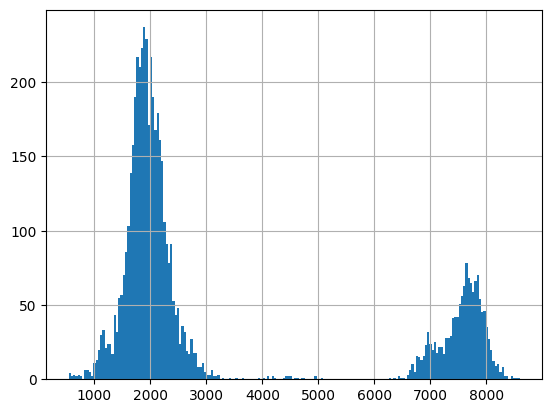

In [ ]:
sub_ens['metastatic_diagnosis_period'].hist(bins=200)


In [ ]:
# Cross-validate ridge to use predictions
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=meta_cv.alpha_, random_state=seed)
oof_preds_final, test_preds_final = CV_predict(oof_preds_combined, y, test_preds_combined, ridge, cv, stratify_col=icd)


Fold # 0: 86.12456
Fold # 1: 81.84329
Fold # 2: 80.93027
Fold # 3: 82.81557
Fold # 4: 82.73741
Fold # 5: 84.52529
Fold # 6: 79.66956
Fold # 7: 78.93187
Fold # 8: 82.57097
Fold # 9: 79.81678

Avg score: 81.99656 ± 2.13784
OOF score: 82.02464


In [ ]:
rmse(y, oof_preds_final)


82.024643698872

In [ ]:
rmse(y, oof_preds_final.apply(lambda x: np.clip(x, a_min=0, a_max=np.inf)))


82.024643698872

In [ ]:
sub_final = solution_raw.copy()
sub_final['metastatic_diagnosis_period'] = test_preds_final['mean']
sub_final['metastatic_diagnosis_period'] = sub_final['metastatic_diagnosis_period'].apply(lambda x: np.clip(x, a_min=0, a_max=np.inf))
sub_final.to_csv('submission_final_stratified.csv', index=False)
sub_final.head() # LB =

patient_id  metastatic_diagnosis_period
0      730681                   211.913285
1      334212                    75.495035
2      571362                   204.892229
3      907331                   228.956283
4      208382                    59.312030

<Axes: >

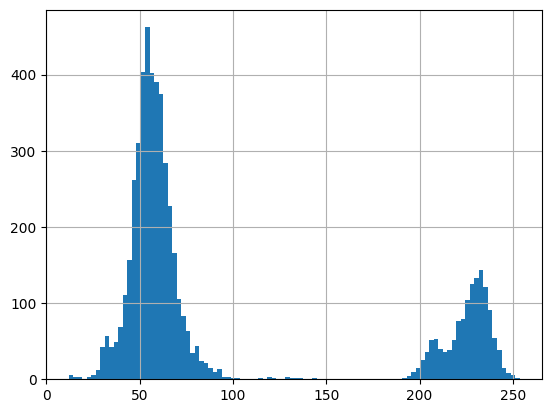

In [ ]:
sub_final['metastatic_diagnosis_period'].hist(bins=100)
